In [1]:
!date

Tue Nov 10 11:21:33 PST 2020


# Compare good vs bad GENE level quantification

In [1]:
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import scanpy as sc
from scipy.stats import ks_2samp, ttest_ind
import ast
from scipy.sparse import csr_matrix
import warnings
warnings.filterwarnings('ignore')

def nd(arr):
    return np.asarray(arr).reshape(-1)

import sys
sys.path.append('/home/sina/projects/mop/BYVSTZP_2020/trackfig')
from trackfig.utils import get_notebook_name
from trackfig.trackfig import trackfig 

TRACKFIG = "/home/sina/projects/mop/BYVSTZP_2020/trackfig.txt"
NB = get_notebook_name()

fsize=20

plt.rcParams.update({'font.size': fsize})
%config InlineBackend.figure_format = 'retina'

In [2]:
cluster_cmap = {
"Astro": (0.38823529411764707, 0.4745098039215686,  0.2235294117647059 ),  # 637939,
"Endo" : (0.5490196078431373,  0.6352941176470588,  0.3215686274509804 ),  # 8ca252,
"SMC"  : (0.7098039215686275,  0.8117647058823529,  0.4196078431372549 ),  # b5cf6b,
"VLMC" : (0.807843137254902,   0.8588235294117647,  0.611764705882353  ),  # cedb9c,
"Low Quality" : (0,0,0),
"L2/3 IT" : (0.9921568627450981,  0.6823529411764706,  0.4196078431372549  ),  # fdae6b
"L5 PT" : (0.9921568627450981,  0.8156862745098039,  0.6352941176470588  ),  # fdd0a2
"L5 IT" : (0.5176470588235295,  0.23529411764705882, 0.2235294117647059 ),  # 843c39
"L5/6 NP": "#D43F3A",
"L6 CT" : (0.8392156862745098,  0.3803921568627451,  0.4196078431372549 ),  # d6616b
"L6 IT" : (0.9058823529411765,  0.5882352941176471,  0.611764705882353  ),  # e7969c
"L6b" : (1.0,                 0.4980392156862745,  0.054901960784313725),  # ff7f0e
"L6 IT Car3" : (1.0,                 0.7333333333333333,  0.47058823529411764 ),  # ffbb78
"Lamp5" : (0.19215686274509805, 0.5098039215686274,  0.7411764705882353  ),  # 3182bd # blues
"Sncg" : (0.4196078431372549,  0.6823529411764706,  0.8392156862745098  ),  # 6baed6
"Vip" : (0.6196078431372549,  0.792156862745098,   0.8823529411764706  ),  # 9ecae1
"Sst" : (0.7764705882352941,  0.8588235294117647,  0.9372549019607843  ),  # c6dbef
"Pvalb":(0.7372549019607844,  0.7411764705882353,  0.8627450980392157  ),  # bcbddc
}

In [3]:
good = pd.concat([pd.read_csv("../../tables/unordered/good_gene_subclass_DE-GLUT.csv", index_col=0),pd.read_csv("../../tables/unordered/good_gene_subclass_DE-GABA.csv", index_col=0)])
bad  = pd.concat([pd.read_csv("../../tables/unordered/bad_gene_subclass_DE-GLUT.csv", index_col=0), pd.read_csv("../../tables/unordered/bad_gene_subclass_DE-GABA.csv", index_col=0)])

In [4]:
gene_good = anndata.read_h5ad("../../data/notebook/revision/no_filter_gene.h5ad")
gene_bad  = anndata.read_h5ad("../../data/notebook/revision/bad_gene.h5ad")

In [5]:
good.groupby("index")['name'].count()

index
L2/3 IT       4529
L5 IT         3294
L5 PT         5811
L5/6 NP       2418
L6 CT         2085
L6 IT         3505
L6 IT Car3    5074
L6b           3205
Lamp5         2053
Pvalb         2652
Sncg          2763
Sst           2563
Vip            654
Name: name, dtype: int64

In [6]:
bad.groupby("index")['name'].count()

index
L2/3 IT       4602
L5 IT         3119
L5 PT         6408
L5/6 NP       2244
L6 CT         2237
L6 IT         3777
L6 IT Car3    5366
L6b           3207
Lamp5         2082
Pvalb         2759
Sncg          2707
Sst           2578
Vip            605
Name: name, dtype: int64

In [7]:
good.index = good["index"] + "_" + good["name"]
bad.index = bad["index"] + "_" + bad["name"]

In [8]:
alpha=0.01
bad = bad.query(f"p_corr  < {alpha}")
good = good.query(f"p_corr  < {alpha}")

In [9]:
fn = np.setdiff1d(good.index.values, bad.index.values)
fp =  np.setdiff1d(bad.index.values,good.index.values)

# False positive

In [10]:
bad.loc[fp].sort_values("p_corr").head(20)

,index,name,p_raw,p_corr,es
L6 IT_Atp2b4_ENSMUSG00000026463,L6 IT,Atp2b4_ENSMUSG00000026463,1.050054e-44,6.202670e-41,0.780912
L6 IT_Ensa_ENSMUSG00000038619,L6 IT,Ensa_ENSMUSG00000038619,7.113686e-36,4.202054e-32,0.161322
L2/3 IT_Atp2b4_ENSMUSG00000026463,L2/3 IT,Atp2b4_ENSMUSG00000026463,9.780605e-32,6.293819e-28,0.495848
Pvalb_Map4_ENSMUSG00000032479,Pvalb,Map4_ENSMUSG00000032479,4.495792e-30,1.598704e-26,0.361348
L6 IT_Smarca2_ENSMUSG00000024921,L6 IT,Smarca2_ENSMUSG00000024921,2.631948e-28,1.554692e-24,0.366221
L2/3 IT_Naa16_ENSMUSG00000022020,L2/3 IT,Naa16_ENSMUSG00000022020,5.156320e-28,3.318092e-24,0.565569
L5 IT_Gm48488_ENSMUSG00000114433,L5 IT,Gm48488_ENSMUSG00000114433,1.041922e-18,5.912909e-15,0.179803
L6 CT_Eif1_ENSMUSG00000035530,L6 CT,Eif1_ENSMUSG00000035530,1.442676e-16,7.435550e-13,0.069100
L6b_Ppp6c_ENSMUSG00000026753,L6b,Ppp6c_ENSMUSG00000026753,4.522912e-16,2.422924e-12,0.214902
L5/6 NP_Hnrnpk_ENSMUSG00000021546,L5/6 NP,Hnrnpk_ENSMUSG00000021546,2.358401e-15,1.085572e-11,0.168608


In [27]:
specific_cluster = "L6 IT"
specific_gene = "Atp2b4_ENSMUSG00000026463"
specific_class = "GABAergic"
specific_class = "Glutamatergic"

In [28]:
specific_gene

'Atp2b4_ENSMUSG00000026463'

In [29]:
def yex(ax):
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    
    # now plot both limits against eachother
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    return ax

In [30]:
def violinplot(data, ax, **kwd): 
    xticklabels = kwd.get("xticklabels", [])
    xticks = kwd.get("xticks", [])
    selected = kwd.get("selected", None)
    color = kwd.get("color", "grey")
    
    if  len(xticks)==0: xticks = np.arange(len(data))+1;
    if  len(xticklabels)==0: xticklabels = np.arange(len(data))+1;
    assert(len(xticks) == len(xticklabels))
        
    violins = ax.violinplot(data, positions=xticks, showmeans=False, showmedians=False, showextrema=False)
    
    for vidx, v in enumerate(violins['bodies']):
        v.set_facecolor(color)
        v.set_edgecolor('black')
        v.set_alpha(1)
        if selected == vidx:
            v.set_facecolor("#D43F3A")

            
    
    for didx, d in enumerate(data):
        x = xticks[didx]
        xx = np.random.normal(x, 0.04, size=len(d))
        
        # actual points
        ax.scatter(xx, d, s = 5, color="white", edgecolor="black", linewidth=1)
        
        # mean and error bars
        mean = np.mean(d)
        stdev = np.sqrt(np.var(d))
        ax.scatter(x, mean, color="lightgrey", edgecolor="black", linewidth=1, zorder=10)    
        ax.vlines(x, mean - stdev, mean+stdev, color='lightgrey', linestyle='-', lw=2, zorder=9)
        
    ax.set(**{"xticks": xticks, "xticklabels":xticklabels})
    ax.set_xticklabels(labels, rotation=45, ha="right")
    return ax


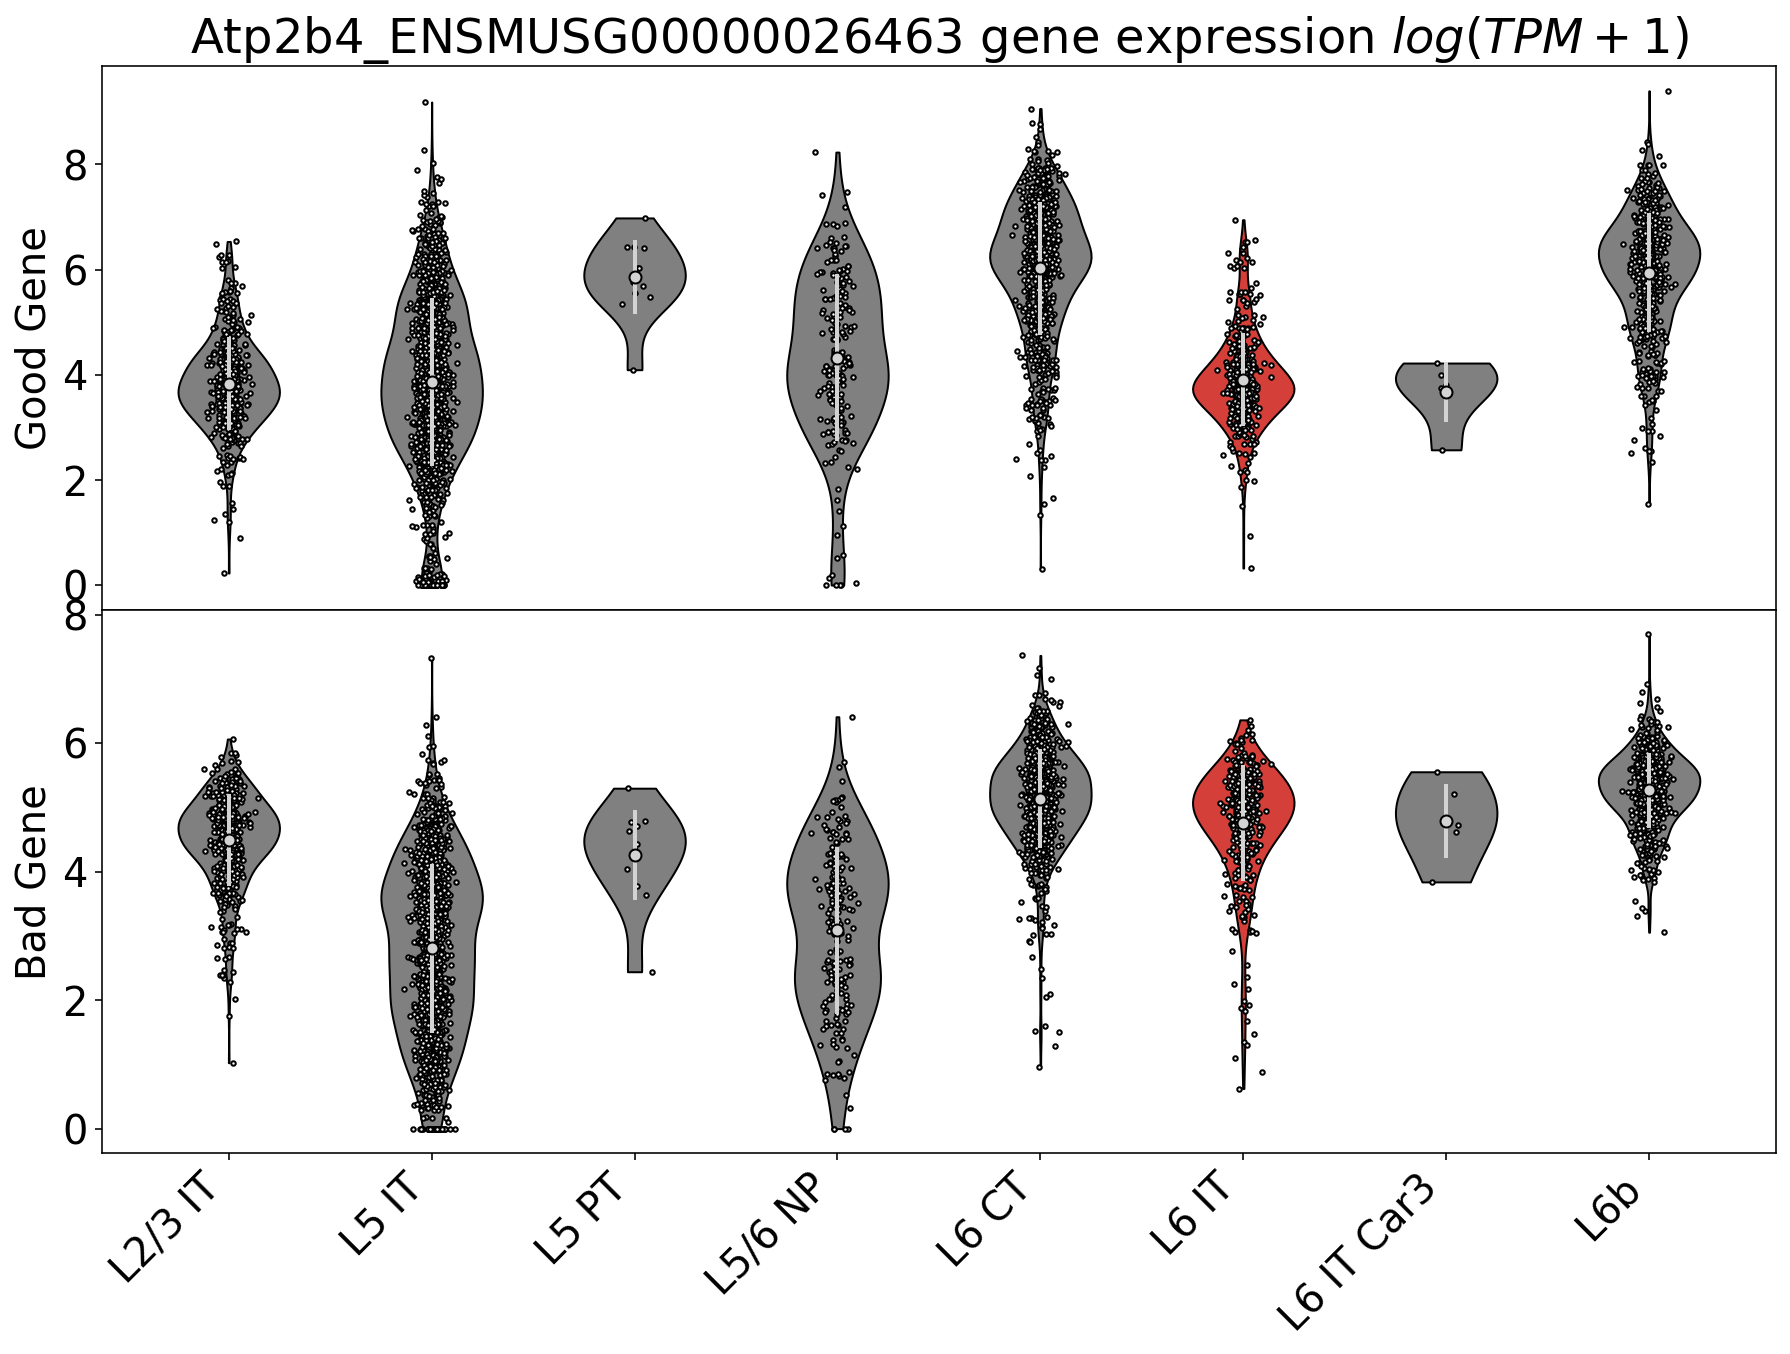

In [31]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
fig.subplots_adjust(hspace=0, wspace=0)

tmp_gene_good = gene_good[gene_good.obs.eval(f"class_label == '{specific_class}'")]
tmp_gene_bad = gene_bad[gene_bad.obs.eval(f"class_label == '{specific_class}'")]

unique = np.unique(tmp_gene_good.obs.subclass_label.values)


labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label==c][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[0], selected=midx)

#################### BAD GENE ####################
x = []
for c in unique:
    x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label==c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[1], selected=midx, xticks=lidx, xticklabels=labels)


ax[0].set(**{
    "ylabel": "Good Gene",
    "title": "{} gene expression $log(TPM + 1)$".format(specific_gene)
})
ax[1].set(**{
    "ylabel": "Bad Gene",
})

#plt.savefig("./figures/class_DE_violin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight',dpi=300)
plt.show()

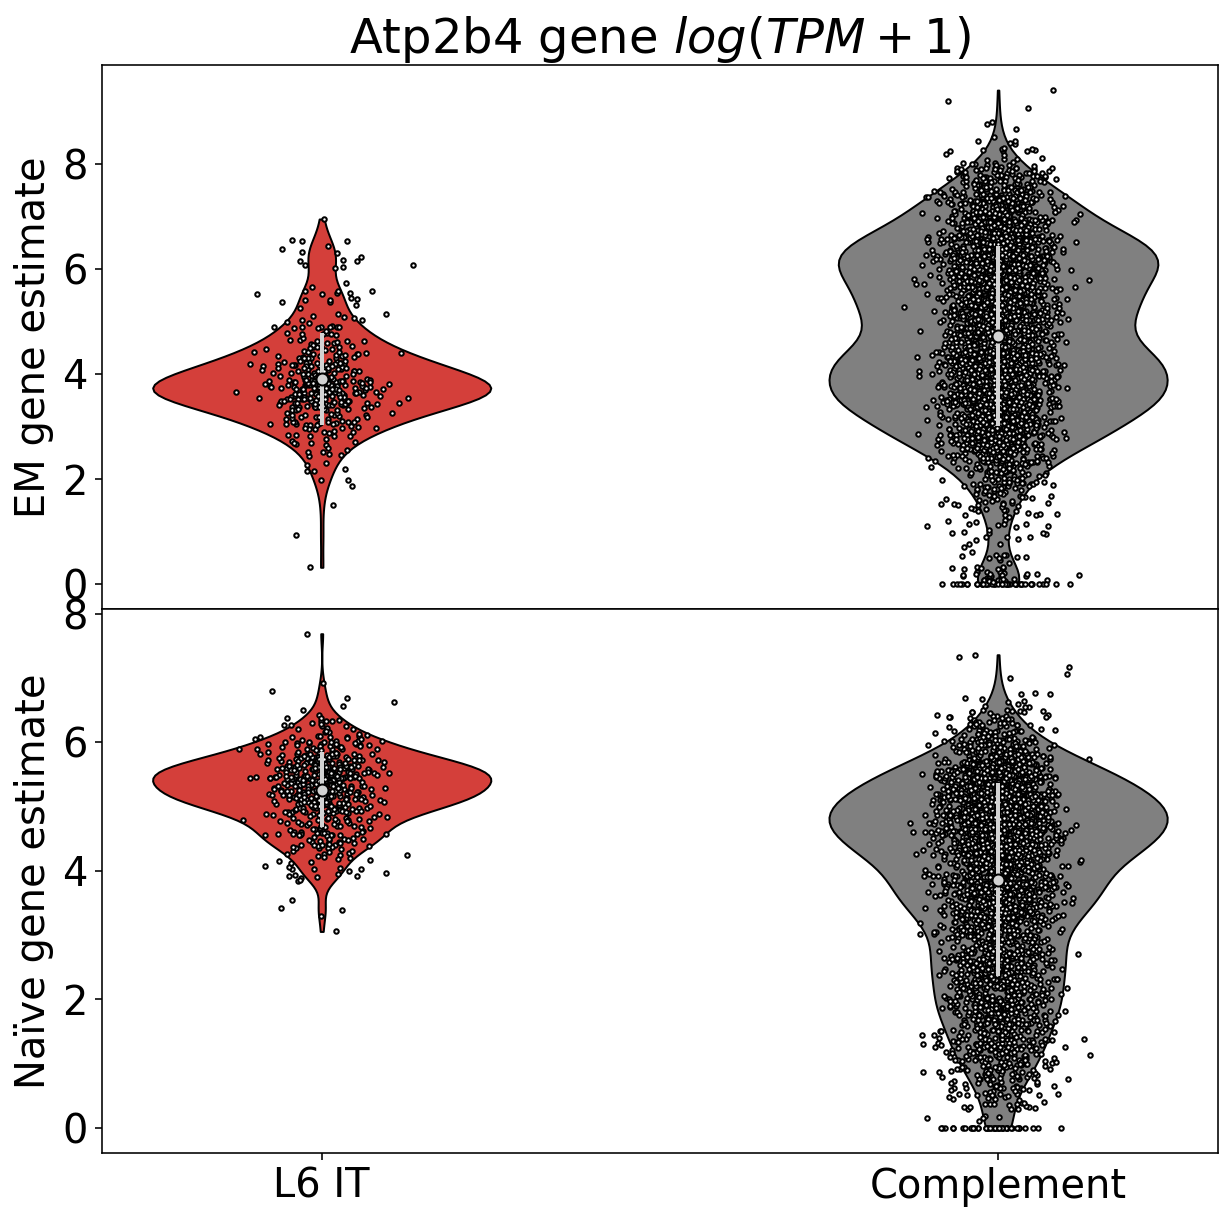

In [32]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(tmp_gene_good.obs.subclass_label.values)


labels = [specific_cluster, "Complement"]
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label==specific_cluster][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())
x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label!=specific_cluster][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[0], selected=0)

#################### BAD GENE ####################
x = []

x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label==c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())
x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label!=c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[1], selected=0, xticks=lidx, xticklabels=labels)


ax[0].set(**{
    "ylabel": "EM gene estimate",
    "title": "{} gene $log(TPM + 1)$".format("".join(specific_gene.split("_")[:-1]))})
ax[1].set(**{
    "ylabel": "Naïve gene estimate",
})

ax[1].set_xticklabels(labels, rotation=0, ha="center")


plt.savefig(trackfig("../../figures/false_positive_violin_subclass_{}.png".format(specific_gene.split("_")[0]), TRACKFIG, NB), bbox_inches='tight',dpi=300)
plt.show()

In [33]:
specific_cluster

'L6 IT'

# False Negative

In [20]:
good.loc[fn].sort_values(["p_corr"]).head(10)

,index,name,p_raw,p_corr,es
L5 IT_Celf2_ENSMUSG00000002107,L5 IT,Celf2_ENSMUSG00000002107,7.429638e-34,4.216320e-30,0.189335
L2/3 IT_Celf2_ENSMUSG00000002107,L2/3 IT,Celf2_ENSMUSG00000002107,4.192807e-26,2.698071e-22,0.249091
L2/3 IT_Camta1_ENSMUSG00000014592,L2/3 IT,Camta1_ENSMUSG00000014592,2.392865e-24,1.539808e-20,0.320249
L6 CT_Rab11a_ENSMUSG00000004771,L6 CT,Rab11a_ENSMUSG00000004771,8.572315e-24,4.418171e-20,0.167632
L6 CT_Zfp729a_ENSMUSG00000021510,L6 CT,Zfp729a_ENSMUSG00000021510,1.828446e-22,9.423813e-19,0.364459
L6 CT_Eloc_ENSMUSG00000079658,L6 CT,Eloc_ENSMUSG00000079658,1.092584e-18,5.631179e-15,0.093144
Vip_Grin2b_ENSMUSG00000030209,Vip,Grin2b_ENSMUSG00000030209,1.356084e-16,2.614530e-13,0.279953
L6 IT Car3_Pih1d1_ENSMUSG00000003423,L6 IT Car3,Pih1d1_ENSMUSG00000003423,3.490321e-15,2.605524e-11,0.615730
L5/6 NP_Syngr1_ENSMUSG00000022415,L5/6 NP,Syngr1_ENSMUSG00000022415,6.889577e-15,3.171272e-11,0.333077
Pvalb_Nrxn1_ENSMUSG00000024109,Pvalb,Nrxn1_ENSMUSG00000024109,1.024562e-14,3.643341e-11,0.253794


In [21]:
specific_cluster = "Vip"
specific_gene = "Grin2b_ENSMUSG00000030209"
specific_class = "GABAergic"

In [22]:
specific_gene

'Grin2b_ENSMUSG00000030209'

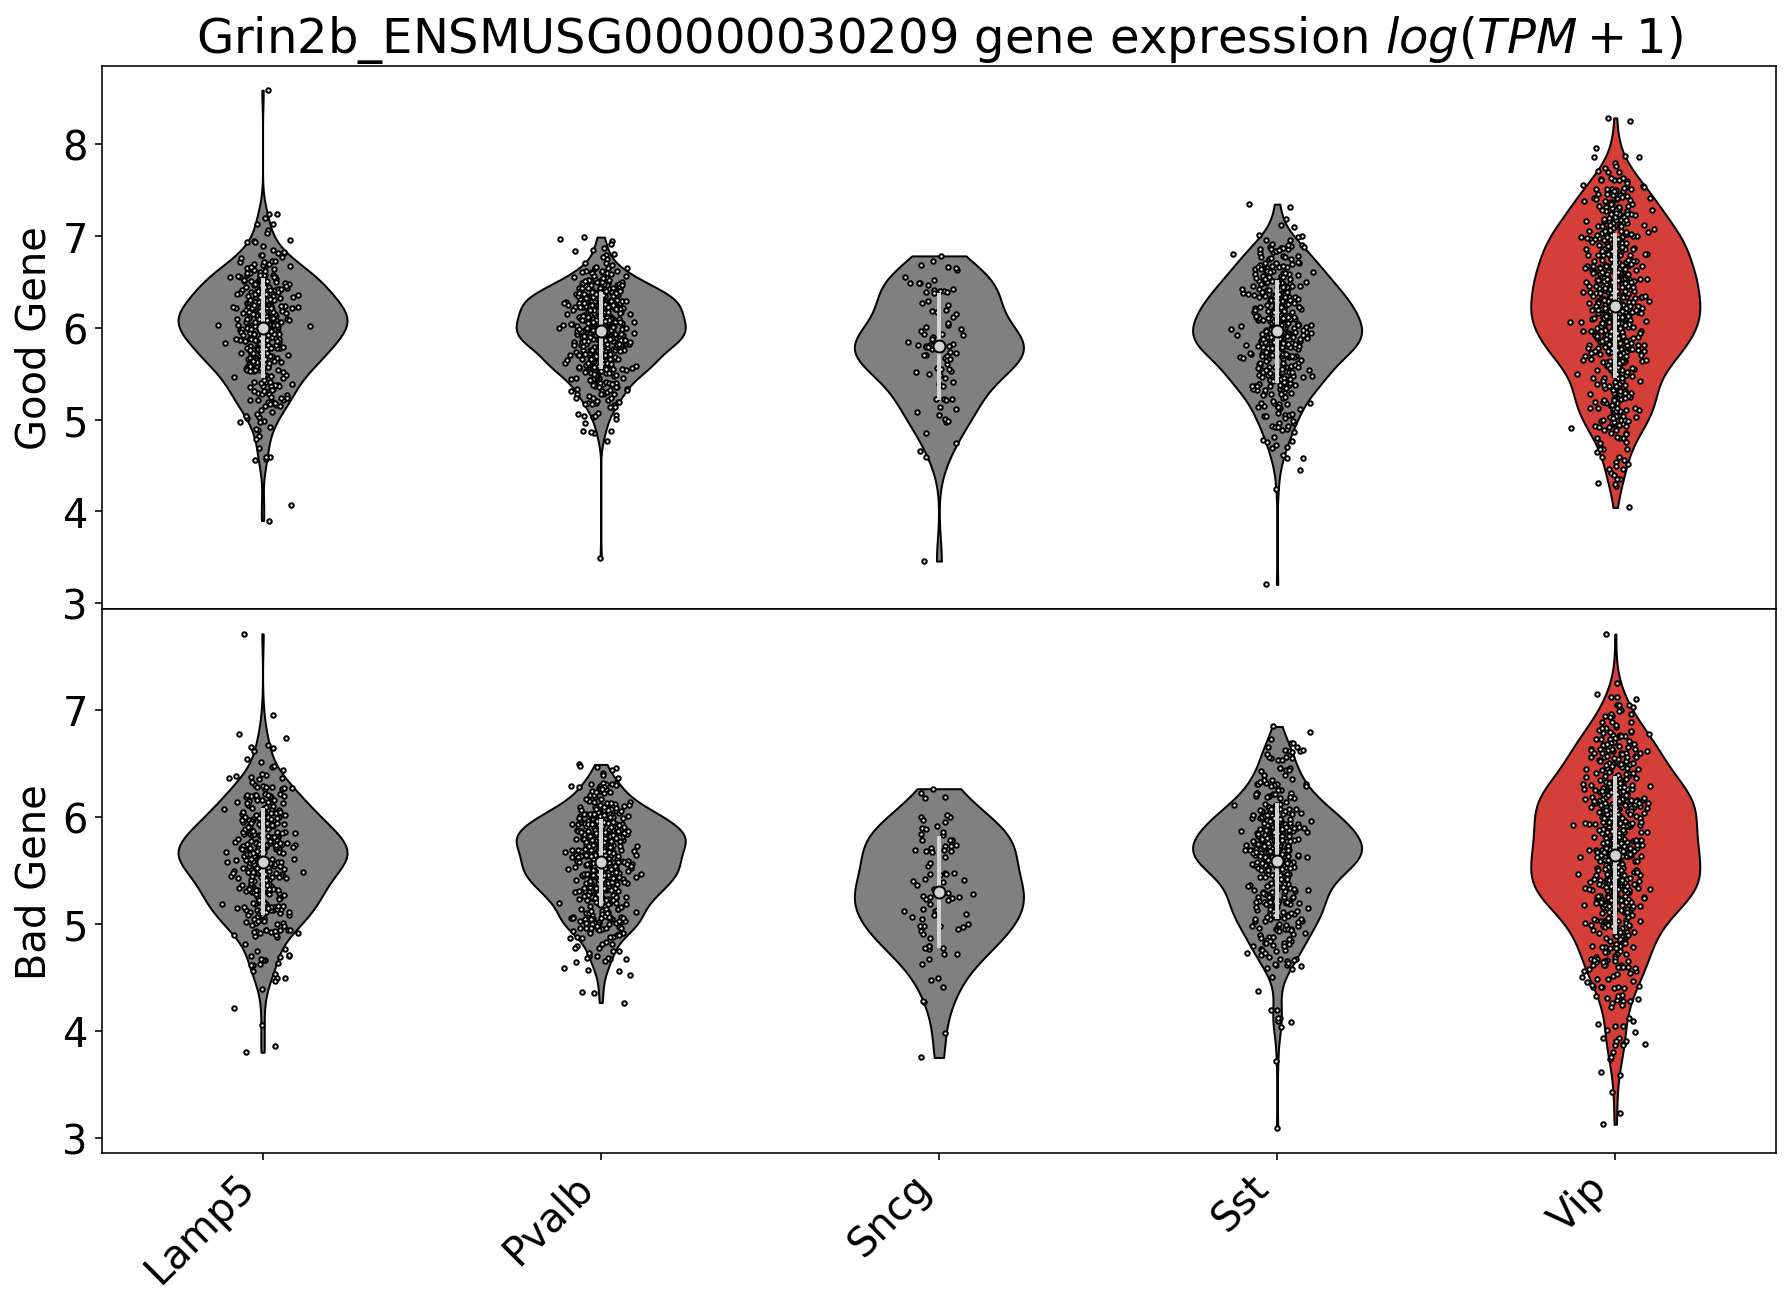

In [23]:
fig, ax = plt.subplots(figsize=(15,10), nrows=2)
fig.subplots_adjust(hspace=0, wspace=0)

tmp_gene_good = gene_good[gene_good.obs.eval(f"class_label == '{specific_class}'")]
tmp_gene_bad = gene_bad[gene_bad.obs.eval(f"class_label == '{specific_class}'")]

unique = np.unique(tmp_gene_good.obs.subclass_label.values)


labels = unique
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
for c in unique:
    x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label==c][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[0], selected=midx)

#################### BAD GENE ####################
x = []
for c in unique:
    x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label==c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[1], selected=midx, xticks=lidx, xticklabels=labels)


ax[0].set(**{
    "ylabel": "Good Gene",
    "title": "{} gene expression $log(TPM + 1)$".format(specific_gene)
})
ax[1].set(**{
    "ylabel": "Bad Gene",
})

#plt.savefig("./figures/class_DE_violin_{}.png".format(specific_gene.split("_")[0]), bbox_inches='tight',dpi=300)
plt.show()

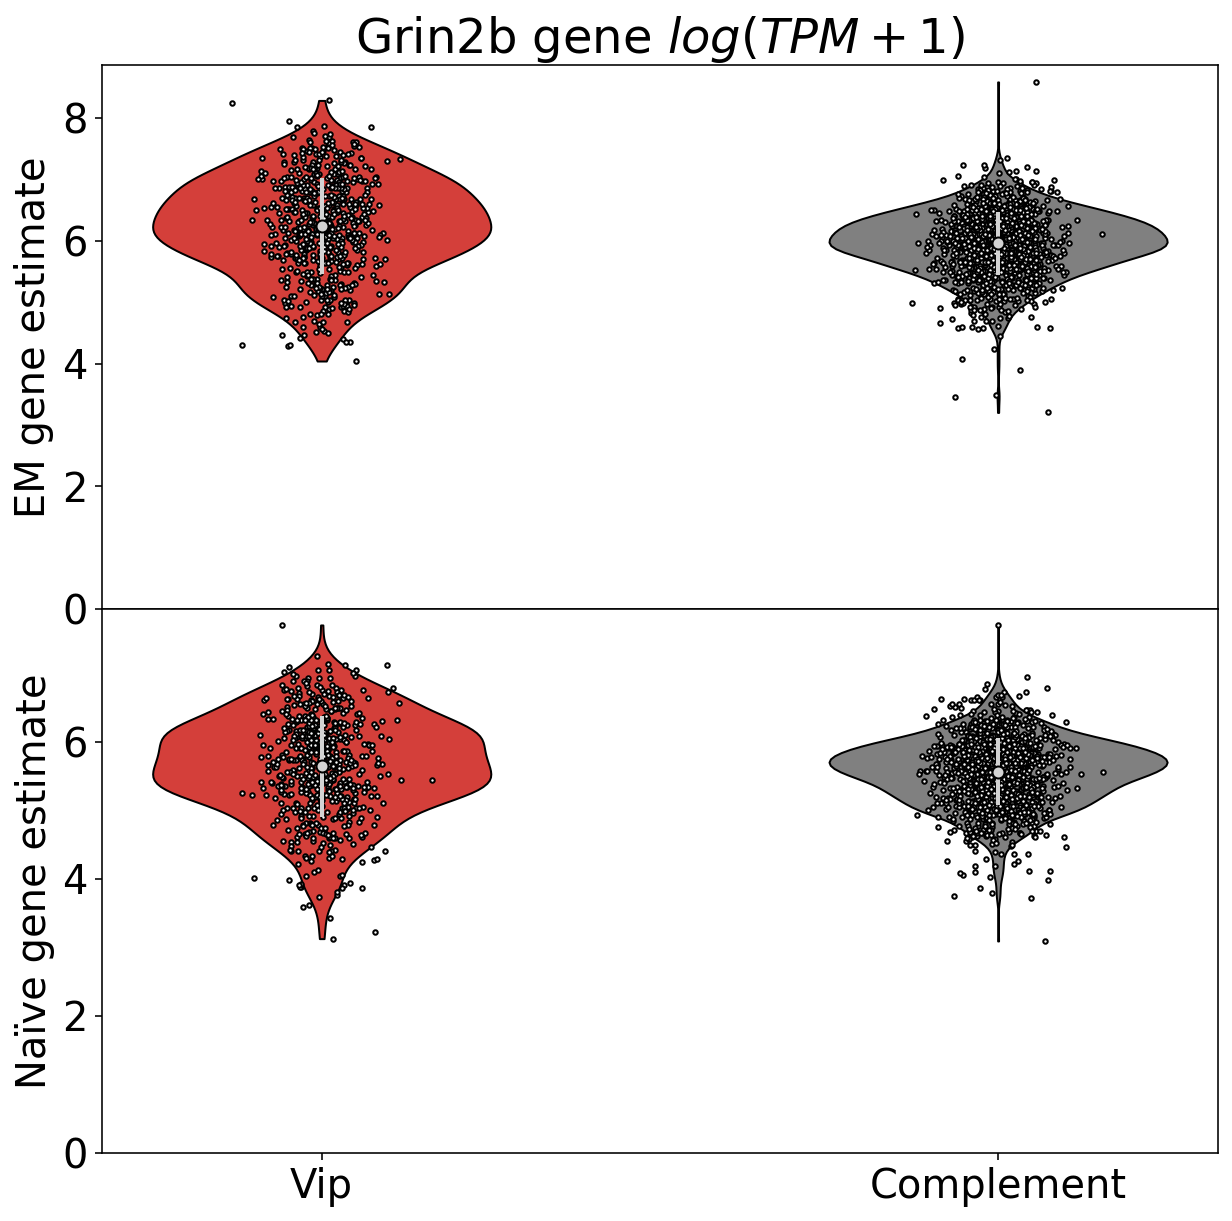

In [26]:
fig, ax = plt.subplots(figsize=(10,10), nrows=2)
fig.subplots_adjust(hspace=0, wspace=0)

unique = np.unique(tmp_gene_good.obs.subclass_label.values)


labels = [specific_cluster, "Complement"]
lidx = np.arange(1, len(labels)+1)  # the label locations
midx = np.where(unique==specific_cluster)[0][0]
#######3# Gene
x = []
x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label==specific_cluster][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())
x.append(np.asarray(tmp_gene_good[tmp_gene_good.obs.subclass_label!=specific_cluster][:,tmp_gene_good.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[0], selected=0)

#################### BAD GENE ####################
x = []

x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label==c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())
x.append(np.asarray(tmp_gene_bad[tmp_gene_bad.obs.subclass_label!=c][:,tmp_gene_bad.var.gene_name.values==specific_gene].layers["log1p"].todense()).reshape(-1).tolist())

violinplot(x, ax[1], selected=0, xticks=lidx, xticklabels=labels)


ax[0].set(**{
    "ylabel": "EM gene estimate",
    "title": "{} gene $log(TPM + 1)$".format("".join(specific_gene.split("_")[:-1])),
    "ylim": 0
})
ax[1].set(**{
    "ylabel": "Naïve gene estimate",
    "ylim": 0
})

ax[1].set_xticklabels(labels, rotation=0, ha="center")


plt.savefig(trackfig("../../figures/false_negative_violin_subclass_{}.png".format(specific_gene.split("_")[0]), TRACKFIG, NB), bbox_inches='tight',dpi=300)
plt.show()